# **customer churn prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_csv("/content/customer_churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [ ]:
df.shape

(5880, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
categorical=[]
countinous=[]
check=[]
d_type=dict(df.dtypes)
for name ,type in d_type.items():
  if str(type)=='object':
    categorical.append(name)
  elif str(type)=='float64':
    countinous.append(name)
  else:
    check.append(name)
print("categorical features:",categorical)
print("countinous features:",countinous)
print("check features:",check)

categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
countinous features: ['MonthlyCharges', 'TotalCharges']
check features: ['SeniorCitizen', 'tenure']


In [ ]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5880,5880.000000,5880,5880,5880.000000,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880,5880.000000,5880.000000,5880
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,Yes,No,NaN,Yes,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card,NaN,NaN,No
freq,2950,NaN,2995,3004,NaN,2941,2939,2029,2029,2029,2029,2029,2029,2029,2020,2990,1503,NaN,NaN,2982
mean,NaN,0.500680,NaN,NaN,36.549150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.157779,2566.813165,NaN
std,NaN,0.500042,NaN,NaN,20.909674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.804615,1910.017743,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.030000,NaN
25%,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.717500,1020.217500,NaN
50%,NaN,1.000000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.155000,2136.445000,NaN
75%,NaN,1.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.457500,3767.665000,NaN


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,2982
Yes,2898


In [ ]:
import pandas as pd
from sklearn.utils import resample

# separate classes
df_no = df[df['Churn'] == 'No']
df_yes = df[df['Churn'] == 'Yes']

# upsample each class to 5000
df_no_upsampled = resample(
    df_no,
    replace=True,
    n_samples=5000,
    random_state=42
)

df_yes_upsampled = resample(
    df_yes,
    replace=True,
    n_samples=5000,
    random_state=42
)

# combine both classes
df_upsampled = pd.concat([df_no_upsampled, df_yes_upsampled])

# shuffle
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# verify
print(df_upsampled['Churn'].value_counts())

Churn
Yes    5000
No     5000
Name: count, dtype: int64


In [ ]:
df = df_upsampled

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['Churn'].value_counts()

,count
Churn,
Yes,5000
No,5000


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


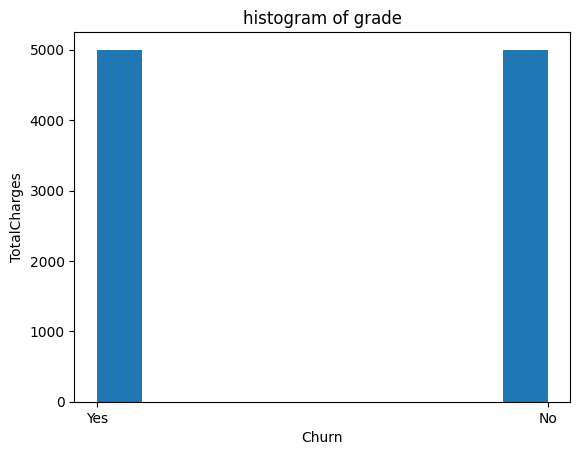

In [ ]:
plt.hist(df['Churn'])
plt.xlabel("Churn")
plt.ylabel("TotalCharges")
plt.title("histogram of grade")
plt.show()

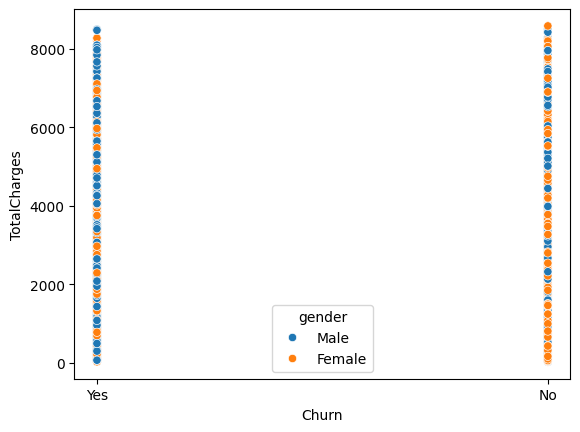

In [ ]:
sns.scatterplot(x='Churn',y='TotalCharges',hue='gender',data=df)
plt.show()

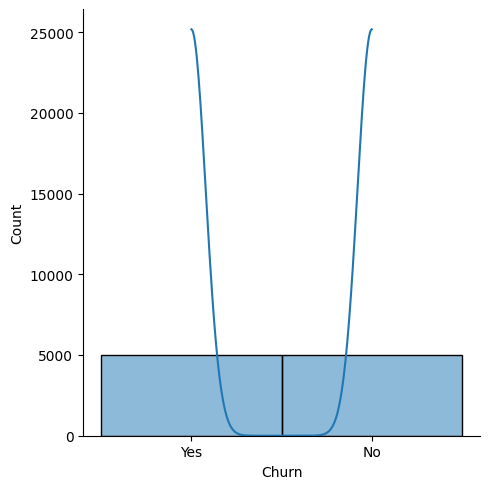

In [ ]:
sns.displot(df['Churn'],bins=10,kde=True)
plt.show()

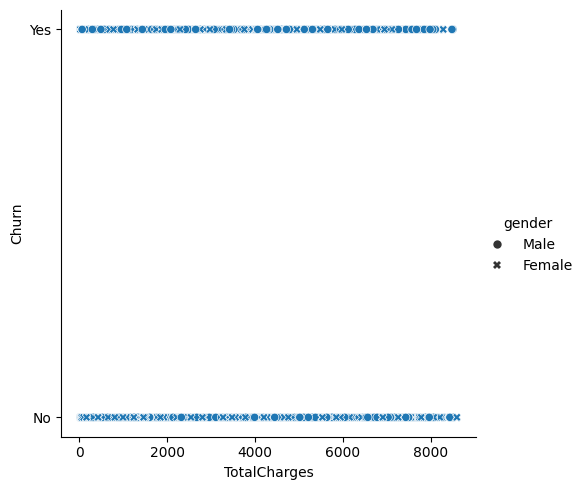

In [ ]:
sns.relplot(x='TotalCharges',y='Churn',data=df,style='gender')
plt.show()

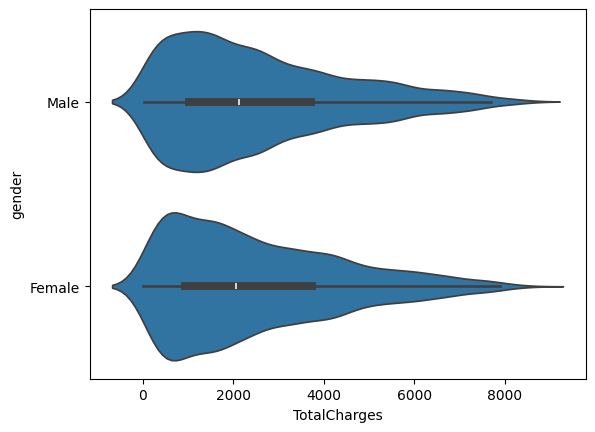

In [ ]:
sns.violinplot(x='TotalCharges',y='gender',data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Apply LabelEncoder to each categorical column
# The 'categorical' list was identified in a previous cell.
for col in categorical:
    df[col] = le.fit_transform(df[col])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,1,0,68,0,1,2,1,1,1,1,1,1,1,0,1,98.65,6708.20,1
1,0,0,1,0,25,0,1,0,0,0,0,2,0,2,0,0,2,58.31,1457.75,0
2,1,0,1,0,20,1,2,2,1,1,1,1,1,1,1,0,2,93.06,1861.20,0
3,1,0,1,0,9,0,1,0,0,2,0,0,0,2,0,1,2,73.00,657.00,0
4,1,1,1,1,22,1,0,2,1,1,1,1,1,1,1,0,2,23.54,517.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,58,0,1,1,2,0,2,0,0,2,0,1,0,91.44,5303.52,1
9996,1,1,0,1,3,1,2,1,2,2,0,2,0,0,2,1,3,21.18,63.54,1
9997,1,0,1,0,61,1,0,0,0,2,0,0,0,0,1,1,2,34.13,2081.93,1
9998,0,1,0,0,12,0,1,1,0,0,2,2,0,0,2,1,2,35.50,426.00,0


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
x=df.drop(columns='Churn')
y=df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

print("train accuracy:", accuracy_score(y_train, ypred_train))
print("test accuracy:", accuracy_score(y_test, ypred_test))

scores = cross_val_score(model, x, y, cv=5)
print("cross validation score:", scores.mean())

train accuracy: 1.0
test accuracy: 0.8735
cross validation score: 0.8763000000000002


In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators':list(range(1,10))}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 9}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model=RandomForestClassifier (random_state=0,n_estimators=9)
model.fit(x_train,y_train)
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

print("train accuracy:",accuracy_score(y_train,ypred_train)) # Corrected variable name
print("test accuracy:",accuracy_score(y_test,ypred_test))   # Corrected variable name

scores=cross_val_score(model,x,y,cv=5) # Used 'model' (RandomForestClassifier) instead of 'df_default'
print("cross validation score:",scores.mean())

train accuracy: 0.995
test accuracy: 0.867
cross validation score: 0.8646


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[859, 133],
       [133, 875]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       992
           1       0.87      0.87      0.87      1008

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))
from sklearn.model_selection import cross_val_score
score=cross_val_score(log_model,x,y,cv=5)
print(score)
score.mean()

0.528
0.502
[0.506  0.4935 0.5125 0.519  0.5135]


np.float64(0.5089)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[501, 491],
       [505, 503]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50       992
           1       0.51      0.50      0.50      1008

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x,y,cv=5)
scores.mean()

0.813375
0.668


np.float64(0.6777)

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,11))}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 1}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x,y,cv=5)
scores.mean()

1.0
0.875


np.float64(0.8788)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[501, 491],
       [505, 503]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       992
           1       0.86      0.89      0.88      1008

    accuracy                           0.88      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.88      0.87      2000



In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x,y,cv=5)
scores.mean()

0.511125
0.501


np.float64(0.8788)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x,y,cv=5)
scores.mean()

0.511125
0.501


np.float64(0.8788)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[501, 491],
       [505, 503]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53       992
           1       0.51      0.44      0.47      1008

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_default=DecisionTreeClassifier()
df_default.fit(x_train,y_train)
pred_train=df_default.predict(x_train)
pred_test=df_default.predict(x_test)
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,pred_train))
print("test accuracy:",accuracy_score(y_test,pred_test))
from sklearn.model_selection import cross_val_score
scores=cross_val_score(df_default,x,y,cv=5)
scores.mean()

train accuracy: 1.0
test accuracy: 0.8735


np.float64(0.8751000000000001)

In [ ]:
df=pd.DataFrame({'algorithm':['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier '],
                 'train accuracy':[0.525375,1.0,0.511125,1.0,0.995],
                 'test accuracy':[0.5015,0.875,0.501,0.871,0.867],
                 'cv scores':[0.5084000000000001,0.8788,0.8788,0.8747999999999999,0.8646]})
df

,algorithm,train accuracy,test accuracy,cv scores
0,LogisticRegression,0.525375,0.5015,0.5084
1,KNeighborsClassifier,1.000000,0.8750,0.8788
2,SVC,0.511125,0.5010,0.8788
3,DecisionTreeClassifier,1.000000,0.8710,0.8748
4,RandomForestClassifier,0.995000,0.8670,0.8646
